In [1]:
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes
from typing import List

import matplotlib.pyplot as plt
import pandas as pd
import re

import config_syntheic as config

In [2]:
def load_csv_data(path: str) -> pd.core.frame.DataFrame:
    """Load CSV dataset as dataframe"""
    return pd.read_csv(path, delimiter=',')

In [3]:
def plot_syntheic_load(true_values: any, predicted_values: any, test_data_path: str) -> None:
    plt.figure(figsize=(10, 6))
    plt.plot(true_values, label='True Values')
    filename = test_data_path.split('/')[-1].split('.')[0]

    for i in range(config.nTrial):
        plt.plot(predicted_values.iloc[:, i], label=f'Prediction {i+1}')

    plt.xlabel('Time step t')
    plt.ylabel('sin(t)')
    plt.title(f'Syntheic Data Prediction ({filename})')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [4]:
def plot_syntheic_load_by_mean_max_min(true_values: any, predicted_values: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)

    # sampling time points
    sampled_time_points = time_points[::sampling_interval]

    mean_values = predicted_values.mean(axis=1)
    sampled_mean_values = mean_values[sampled_time_points]

    max_values = predicted_values.max(axis=1)
    min_values = predicted_values.min(axis=1)

    sampled_max_values = max_values[sampled_time_points]
    sampled_min_values = min_values[sampled_time_points]

    plt.plot(sampled_time_points, sampled_mean_values, marker='^', linestyle='-', color='blue', label='Mean')
    plt.plot(sampled_time_points, sampled_max_values, marker='_', linestyle='', color='red', label='Max')
    plt.plot(sampled_time_points, sampled_min_values, marker='_', linestyle='', color='green', label='Min')
    plt.plot(true_values, color='black', label='True Values')

    for t in sampled_time_points:
        plt.plot([t, t], [sampled_min_values[t], sampled_max_values[t]], linestyle='-', color='gray')

    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()


In [5]:
def plot_syntheic_load_by_mean_std(true_values: any, predicted_values: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)
    sampled_time_points = time_points[::sampling_interval]

    mean_values = predicted_values.mean(axis=1)
    std_values = predicted_values.std(axis=1)

    sampled_mean_values = mean_values[sampled_time_points]
    sampled_std_values = std_values[sampled_time_points]

    plt.plot(sampled_time_points, sampled_mean_values, marker='^', markersize=6, linestyle='-', color='blue', label='Prediction')
    plt.errorbar(sampled_time_points, sampled_mean_values, yerr=sampled_std_values, fmt='_', color='red', elinewidth=1, capsize=3)
    plt.plot(time_points, true_values, color='black', label='True Values')

    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [6]:
def plot_syntheic_load_list_by_mean_std(true_values: any, predicted_values_list: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)
    sampled_time_points = time_points[::sampling_interval]

    sampled_mean_values_list = []
    sampled_std_values_list = []

    for case_predicted_value in predicted_values_list:
        mean_values = case_predicted_value.mean(axis=1)
        std_values = case_predicted_value.std(axis=1)

        sampled_mean_values_list.append(mean_values[sampled_time_points])
        sampled_std_values_list.append(std_values[sampled_time_points])
    
    for index in range(len(sampled_mean_values_list)):
        plt.plot(sampled_time_points, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=f'Case {index+1}')
        # plt.errorbar(sampled_time_points, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3)

    plt.plot(time_points, true_values, color='black', label='True Values')

    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [7]:
def plot_syntheic_load_list_by_mean_std_with_labels(true_values: any, predicted_values_list: any, labels: List[str],  sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)
    sampled_time_points = time_points[::sampling_interval]

    sampled_mean_values_list = []
    sampled_std_values_list = []

    for case_predicted_value in predicted_values_list:
        mean_values = case_predicted_value.mean(axis=1)
        std_values = case_predicted_value.std(axis=1)

        sampled_mean_values_list.append(mean_values[sampled_time_points])
        sampled_std_values_list.append(std_values[sampled_time_points])
    
    for label in labels:
        case_number = int(re.search(r'\d+', label).group())  # Extract case number from label
        color = config.color_dict.get(case_number, 'k')  # Default to black if case number not found
        index = labels.index(label)
        
        plt.plot(sampled_time_points, sampled_mean_values_list[index], markersize=6, linestyle='-', label=label, color=color)
        # plt.errorbar(sampled_time_points, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3)

    plt.plot(time_points, true_values, color='black', label='True Values')

    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [8]:
def plot_prediction_absolute_error(error_abs_value: any) -> None:
    plt.figure(figsize=(10, 6))

    x_values = [i for i in range(config.start, config.end+1)]

    for i in range(config.nTrial):
        plt.plot(x_values, error_abs_value.iloc[:, i], label=f'Prediction {i+1}')

    plt.xlabel('Time step t')
    plt.ylabel('Prediction error')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [9]:
def plot_prediction_absolute_error_by_mean_std(error_abs_value: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    # TODO: fix this error epoch start and end
    x_values = range(config.start, config.end+1)
    sampled_x_values = x_values[::sampling_interval]

    time_points = range(config.error_abs_start, config.error_abs_end+1)
    sampled_time_points = time_points[::sampling_interval]

    mean_values = error_abs_value.mean(axis=1)
    std_values = error_abs_value.std(axis=1)

    sampled_mean_values = mean_values[sampled_time_points]
    sampled_std_values = std_values[sampled_time_points]

    # TODO: fix this error epoch start and end
    plt.plot(sampled_x_values, sampled_mean_values, marker='^', markersize=6, linestyle='-', color='blue', label='Error')
    # TODO: fix this error epoch start and end
    plt.errorbar(sampled_x_values, sampled_mean_values, yerr=sampled_std_values, fmt='_', color='red', elinewidth=1, capsize=3)

    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()
    

In [10]:
def plot_prediction_absolute_error_list_by_mean_std(error_abs_value_list: any, sampling_interval: int, zoom_coords: tuple) -> None:
    fig, ax = plt.subplots(figsize=(10, 6))

    x_values = range(config.start, config.end+1)
    sampled_x_values = x_values[::sampling_interval]

    time_points = range(config.error_abs_start, config.error_abs_end+1)
    sampled_time_points = time_points[::sampling_interval]

    sampled_mean_values_list = []
    sampled_std_values_list = []

    for case_error_abs_value in error_abs_value_list:
        mean_values = case_error_abs_value.mean(axis=1)
        std_values = case_error_abs_value.std(axis=1)

        sampled_mean_values_list.append(mean_values[sampled_time_points])
        sampled_std_values_list.append(std_values[sampled_time_points])

    for index in range(len(sampled_mean_values_list)):
        color = config.color_dict.get(index % len(config.color_dict))
        ax.plot(sampled_x_values, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=f'Case {index+1}')
        ax.errorbar(sampled_x_values, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3, color=color)

    ax.set_xlabel('Time Step t')
    ax.set_ylabel('Prediction error')
    ax.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    
    zoom_coords_x = zoom_coords[0]
    zoom_coords_y = zoom_coords[1]

    # The `inset_axes`` function is used to create an inset axes, allowing you to create a zoomed-in plot within a larger plot.
    # It can be used to specify the position and size of the inset axes.
    # The `bbox_to_anchor`` parameter is used to specify the relative position of the inset axes within the parent axes.
    ax_zoom = inset_axes(ax, width="100%", height="100%", bbox_to_anchor=(1.08, 0.2, 0.5, 0.5), bbox_transform=ax.transAxes)
    
    for index in range(len(sampled_mean_values_list)):
        color = config.color_dict.get(index % len(config.color_dict))
        ax_zoom.plot(sampled_x_values, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=f'Case 1')
        ax_zoom.errorbar(sampled_x_values, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3, color=color)
    
    ax_zoom.axhline(y=min(sampled_mean_values_list[0]), color='gray', linestyle='--')
    ax_zoom.set_xlim(*zoom_coords_x) 
    ax_zoom.set_ylim(*zoom_coords_y)
    mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")
    
    plt.show()

In [11]:
def plot_prediction_absolute_error_list_by_mean_std_with_labels(error_abs_value_list: any, labels: List[str], sampling_interval: int, zoom_coords: tuple) -> None:
    fig, ax = plt.subplots(figsize=(10, 6))

    x_values = range(config.start, config.end+1)
    sampled_x_values = x_values[::sampling_interval]

    time_points = range(config.error_abs_start, config.error_abs_end+1)
    sampled_time_points = time_points[::sampling_interval]

    sampled_mean_values_list = []
    sampled_std_values_list = []

    for case_error_abs_value in error_abs_value_list:
        mean_values = case_error_abs_value.mean(axis=1)
        std_values = case_error_abs_value.std(axis=1)

        sampled_mean_values_list.append(mean_values[sampled_time_points])
        sampled_std_values_list.append(std_values[sampled_time_points])

    for label in labels:
        case_number = int(re.search(r'\d+', label).group())  # Extract case number from label
        color = config.color_dict.get(case_number, 'k')  # Default to black if case number not found
        index = labels.index(label)
        ax.plot(sampled_x_values, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=label, color=color)
        ax.errorbar(sampled_x_values, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3, color=color)

    ax.set_xlabel('Time Step t')
    ax.set_ylabel('Prediction error')
    ax.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    
    zoom_coords_x = zoom_coords[0]
    zoom_coords_y = zoom_coords[1]

    # The `inset_axes`` function is used to create an inset axes, allowing you to create a zoomed-in plot within a larger plot.
    # It can be used to specify the position and size of the inset axes.
    # The `bbox_to_anchor`` parameter is used to specify the relative position of the inset axes within the parent axes.
    ax_zoom = inset_axes(ax, width="100%", height="100%", bbox_to_anchor=(1.08, 0.2, 0.5, 0.5), bbox_transform=ax.transAxes)
    
    for label in labels:
        case_number = int(re.search(r'\d+', label).group())  # Extract case number from label
        color = config.color_dict.get(case_number, 'k')  # Default to black if case number not found
        index = labels.index(label)
        ax_zoom.plot(sampled_x_values, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=label, color=color)
        ax_zoom.errorbar(sampled_x_values, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3, color=color)
    
    ax_zoom.axhline(y=min(sampled_mean_values_list[0]), color='gray', linestyle='--')
    ax_zoom.set_xlim(*zoom_coords_x) 
    ax_zoom.set_ylim(*zoom_coords_y)
    mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")
    
    plt.show()

## Case1

In [12]:
case1_df = load_csv_data(config.case1_predict_results_path)
case1_df.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,0.500000,NaN,0.5025,0.5025,0.5025,0.5025,0.5025,0.5025,0.5025,0.5025,0.5025,0.5025,NaN
1,2,0.531395,NaN,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,NaN
2,3,0.562667,NaN,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,NaN
3,4,0.593691,NaN,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,NaN
4,5,0.624345,NaN,0.6225,0.6225,0.6225,0.6225,0.6225,0.6225,0.6225,0.6225,0.6225,0.6225,NaN


In [13]:
case1_df.tail()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
119996,59996,NaN,NaN,0.006845,0.006845,0.006845,0.006845,0.006845,0.006845,0.006845,0.006845,0.006845,0.006845,NaN
119997,59997,NaN,NaN,0.001309,0.001309,0.001309,0.001309,0.001309,0.001309,0.001309,0.001309,0.001309,0.001309,NaN
119998,59998,NaN,NaN,0.005167,0.005167,0.005167,0.005167,0.005167,0.005167,0.005167,0.005167,0.005167,0.005167,NaN
119999,59999,NaN,NaN,0.003605,0.003605,0.003605,0.003605,0.003605,0.003605,0.003605,0.003605,0.003605,0.003605,NaN
120000,60000,NaN,NaN,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,NaN


In [14]:
# true values need to be shifted by 1
true_values = case1_df["TRUE"][config.start+1:config.end+1+1]
true_values

39901    2.531400
39902    2.562670
39903    2.593690
39904    2.624340
39905    2.654510
           ...   
40097    0.406309
40098    0.437333
40099    0.468605
40100    0.500000
40101    0.531395
Name: TRUE, Length: 201, dtype: float64

In [15]:
predicted_column = list(map(lambda x: str(x), range(1, config.nTrial+1)))
case1_predicted_values = case1_df[predicted_column][config.start:config.end+1]
case1_predicted_values

,1,2,3,4,5,6,7,8,9,10
39900,2.5350,2.5350,2.5350,2.5350,2.5350,2.5350,2.5350,2.53500,2.5350,2.5350
39901,2.5575,2.5650,2.5575,2.5650,2.5650,2.5575,2.5575,2.55750,2.5650,2.5650
39902,2.5950,2.5950,2.5950,2.5950,2.5950,2.5950,2.5950,2.59500,2.5950,2.5950
39903,2.6250,2.6250,2.6250,2.6250,2.6250,2.6250,2.6250,2.61750,2.6250,2.6175
39904,2.6550,2.6550,2.6550,2.6550,2.6550,2.6550,2.6550,2.65125,2.6550,2.6550
...,...,...,...,...,...,...,...,...,...,...
40096,0.4050,0.4050,0.4050,0.4050,0.4050,0.4050,0.4050,0.40500,0.4050,0.4050
40097,0.4425,0.4425,0.4425,0.4425,0.4425,0.4425,0.4425,0.44250,0.4425,0.4425
40098,0.4650,0.4650,0.4650,0.4650,0.4650,0.4650,0.4650,0.46500,0.4650,0.4650
40099,0.5025,0.5025,0.5025,0.5025,0.5025,0.5025,0.5025,0.50250,0.5025,0.5025


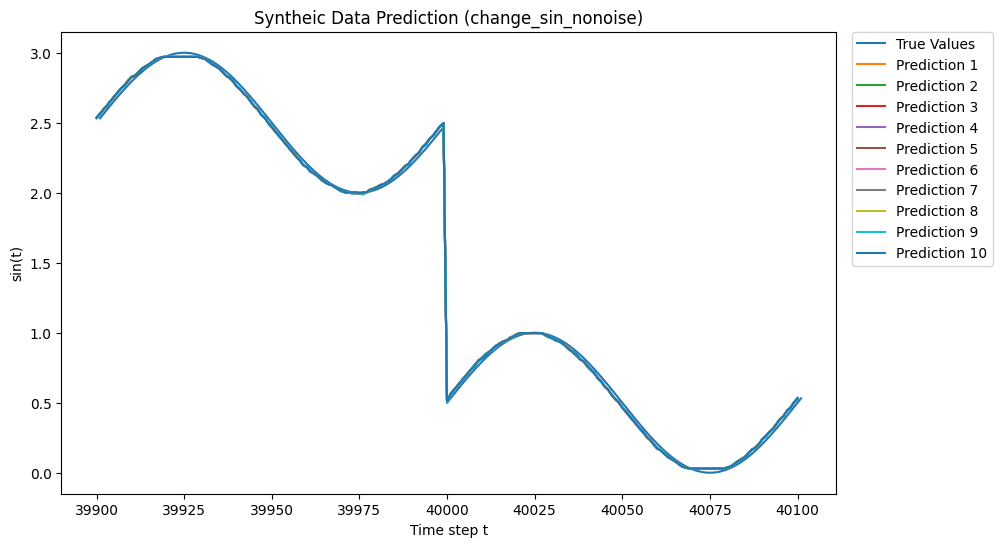

In [16]:
plot_syntheic_load(true_values, case1_predicted_values, config.test_data_path)

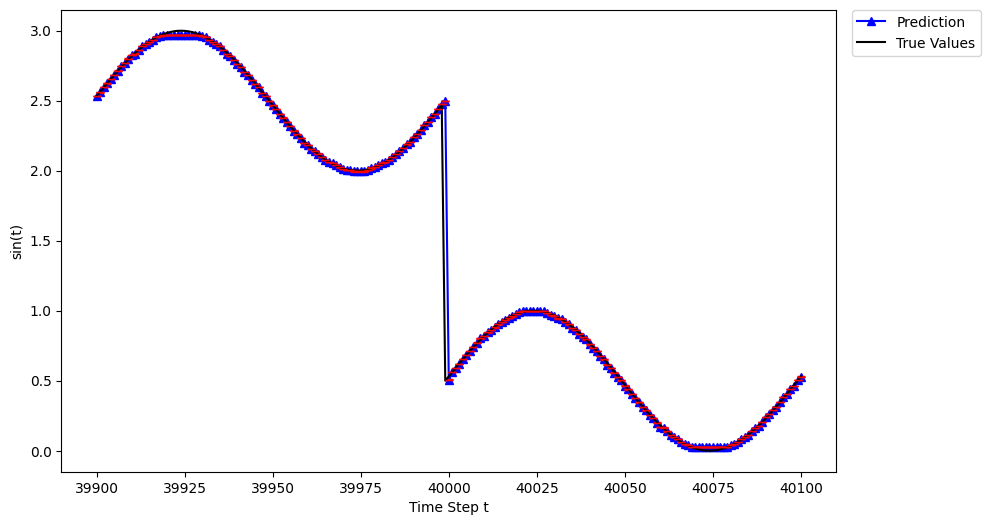

In [17]:
plot_syntheic_load_by_mean_std(true_values, case1_predicted_values, sampling_interval=config.sampling_interval)

In [18]:
# abs(outputdata[n][a] - inputdata[a+1])
case1_error_abs_value = case1_df[predicted_column][config.error_abs_start:config.error_abs_end+1]
case1_error_abs_value

,1,2,3,4,5,6,7,8,9,10
99900,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500
99901,0.003600,0.003600,0.003600,0.003600,0.003600,0.003600,0.003600,0.003600,0.003600,0.003600
99902,0.005170,0.002330,0.005170,0.002330,0.002330,0.005170,0.005170,0.005170,0.002330,0.002330
99903,0.001310,0.001310,0.001310,0.001310,0.001310,0.001310,0.001310,0.001310,0.001310,0.001310
99904,0.000660,0.000660,0.000660,0.000660,0.000660,0.000660,0.000660,0.006840,0.000660,0.006840
...,...,...,...,...,...,...,...,...,...,...
100096,0.006845,0.006845,0.006845,0.006845,0.006845,0.006845,0.006845,0.006845,0.006845,0.006845
100097,0.001309,0.001309,0.001309,0.001309,0.001309,0.001309,0.001309,0.001309,0.001309,0.001309
100098,0.005167,0.005167,0.005167,0.005167,0.005167,0.005167,0.005167,0.005167,0.005167,0.005167
100099,0.003605,0.003605,0.003605,0.003605,0.003605,0.003605,0.003605,0.003605,0.003605,0.003605


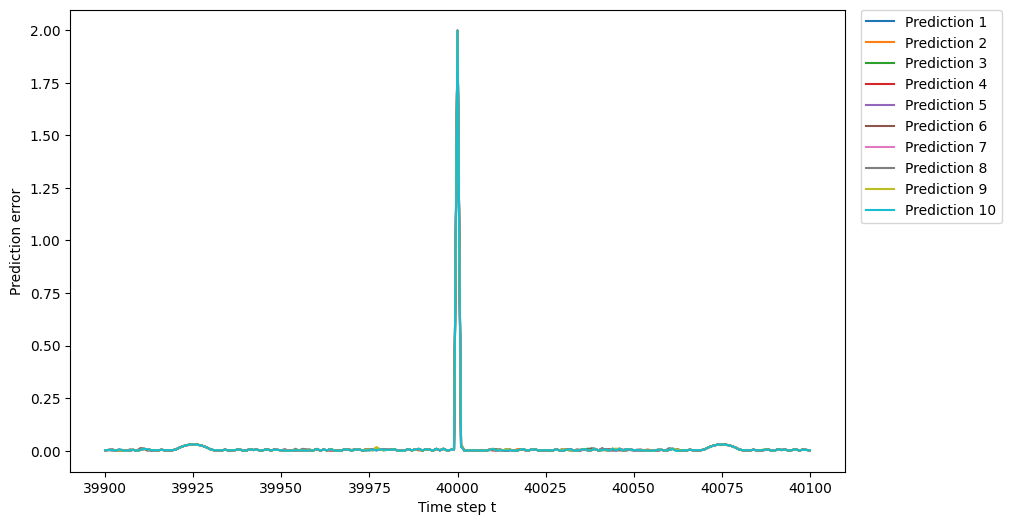

In [19]:
plot_prediction_absolute_error(case1_error_abs_value)

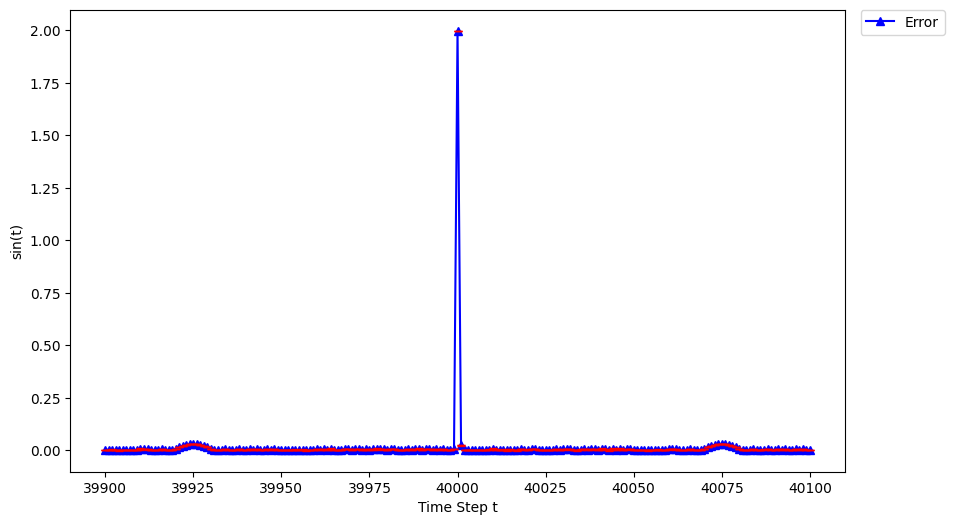

In [20]:
plot_prediction_absolute_error_by_mean_std(case1_error_abs_value, sampling_interval=config.sampling_interval)

## Case2

In [21]:
case2_df = load_csv_data(config.case2_predict_results_path)
case2_df.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,0.500000,NaN,0.4875,0.4875,0.4875,0.4875,0.4875,0.4875,0.4875,0.4875,0.4875,0.4875,NaN
1,2,0.531395,NaN,0.5250,0.5250,0.5250,0.5250,0.5250,0.5250,0.5250,0.5250,0.5250,0.5250,NaN
2,3,0.562667,NaN,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,NaN
3,4,0.593691,NaN,0.6000,0.6000,0.6000,0.6000,0.6000,0.6000,0.6000,0.6000,0.6000,0.6000,NaN
4,5,0.624345,NaN,0.6375,0.6375,0.6375,0.6375,0.6375,0.6375,0.6375,0.6375,0.6375,0.6375,NaN


In [22]:
case2_df.tail()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
119996,59996,NaN,NaN,0.000655,0.000655,0.000655,0.036845,0.036845,0.036845,0.000655,0.000655,0.000655,0.000655,NaN
119997,59997,NaN,NaN,0.006191,0.006191,0.006191,0.043691,0.043691,0.043691,0.006191,0.024941,0.006191,0.006191,NaN
119998,59998,NaN,NaN,0.012667,0.012667,0.012667,0.012667,0.012667,0.012667,0.012667,0.012667,0.012667,0.012667,NaN
119999,59999,NaN,NaN,0.018895,0.018605,0.018895,0.018895,0.018605,0.018895,0.018895,0.018895,0.018605,0.018895,NaN
120000,60000,NaN,NaN,0.012500,0.050000,0.012500,0.025000,0.012500,0.012500,0.012500,0.012500,0.050000,0.012500,NaN


In [23]:
# true values need to be shifted by 1
true_values = case2_df["TRUE"][config.start+1:config.end+1+1]
true_values

39901    2.531400
39902    2.562670
39903    2.593690
39904    2.624340
39905    2.654510
           ...   
40097    0.406309
40098    0.437333
40099    0.468605
40100    0.500000
40101    0.531395
Name: TRUE, Length: 201, dtype: float64

In [24]:
predicted_column = list(map(lambda x: str(x), range(1, config.nTrial+1)))
case2_predicted_values = case2_df[predicted_column][config.start:config.end+1]
case2_predicted_values

,1,2,3,4,5,6,7,8,9,10
39900,2.4750,2.5500,2.5125,2.5500,2.5500,2.58750,2.55000,2.5500,2.51250,2.53125
39901,2.5500,2.5500,2.5500,2.5500,2.5875,2.58750,2.55000,2.5875,2.55000,2.55000
39902,2.5500,2.5875,2.5875,2.5500,2.6250,2.58750,2.58750,2.6250,2.58750,2.55000
39903,2.5875,2.5875,2.5875,2.5875,2.6250,2.62500,2.60625,2.6250,2.58750,2.58750
39904,2.5875,2.6250,2.6250,2.6250,2.6625,2.66250,2.58750,2.6625,2.58750,2.58750
...,...,...,...,...,...,...,...,...,...,...
40096,0.4875,0.4125,0.4500,0.4125,0.3750,0.41250,0.45000,0.4500,0.43125,0.45000
40097,0.5250,0.4500,0.4875,0.4500,0.4500,0.45000,0.45000,0.4500,0.45000,0.45000
40098,0.5250,0.4875,0.4875,0.4500,0.4500,0.48750,0.46875,0.4875,0.48750,0.48750
40099,0.5625,0.4875,0.5250,0.4875,0.4875,0.50625,0.48750,0.5250,0.48750,0.48750


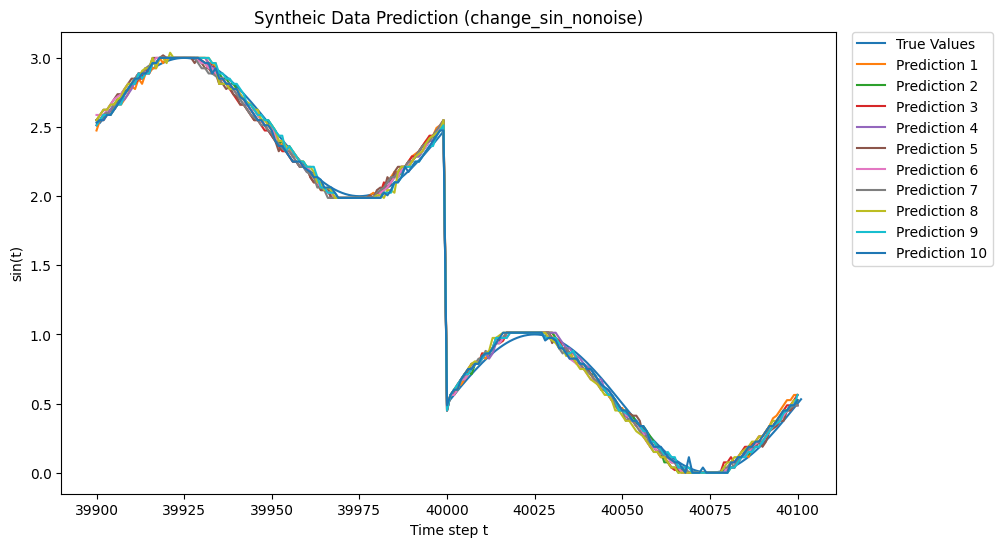

In [25]:
plot_syntheic_load(true_values, case2_predicted_values, config.test_data_path)

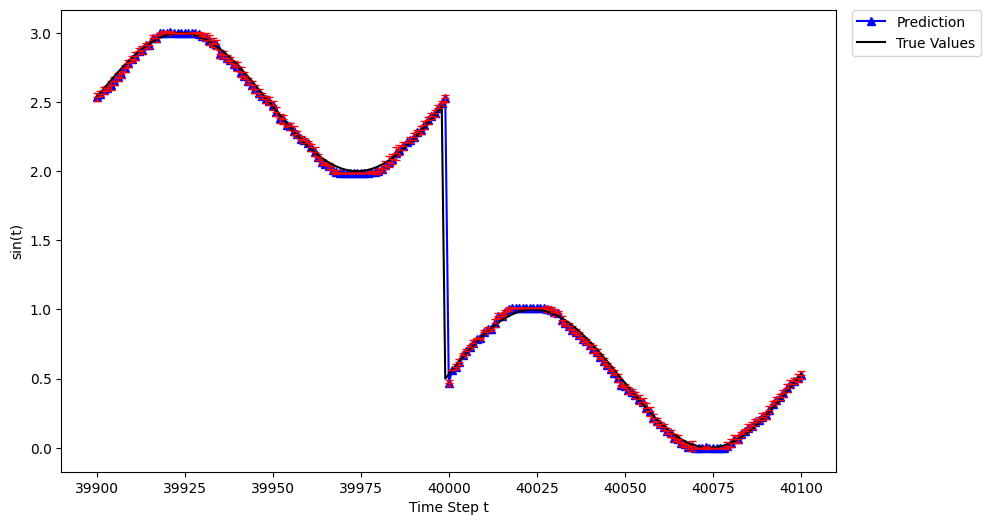

In [26]:
plot_syntheic_load_by_mean_std(true_values, case2_predicted_values, sampling_interval=config.sampling_interval)

In [27]:
# abs(outputdata[n][a] - inputdata[a+1])
case2_error_abs_value = case2_df[predicted_column][config.error_abs_start:config.error_abs_end+1]
case2_error_abs_value

,1,2,3,4,5,6,7,8,9,10
99900,0.012500,0.031250,0.012500,0.025000,0.050000,0.050000,0.050000,0.050000,0.012500,0.025000
99901,0.056400,0.018600,0.018900,0.018600,0.018600,0.056100,0.018600,0.018600,0.018900,0.000150
99902,0.012670,0.012670,0.012670,0.012670,0.024830,0.024830,0.012670,0.024830,0.012670,0.012670
99903,0.043690,0.006190,0.006190,0.043690,0.031310,0.006190,0.006190,0.031310,0.006190,0.043690
99904,0.036840,0.036840,0.036840,0.036840,0.000660,0.000660,0.018090,0.000660,0.036840,0.036840
...,...,...,...,...,...,...,...,...,...,...
100096,0.074345,0.000655,0.036845,0.000655,0.000655,0.000655,0.000655,0.036845,0.000655,0.036845
100097,0.081191,0.006191,0.043691,0.006191,0.031309,0.006191,0.043691,0.043691,0.024941,0.043691
100098,0.087667,0.012667,0.050167,0.012667,0.012667,0.012667,0.012667,0.012667,0.012667,0.012667
100099,0.056395,0.018895,0.018895,0.018605,0.018605,0.018895,0.000145,0.018895,0.018895,0.018895


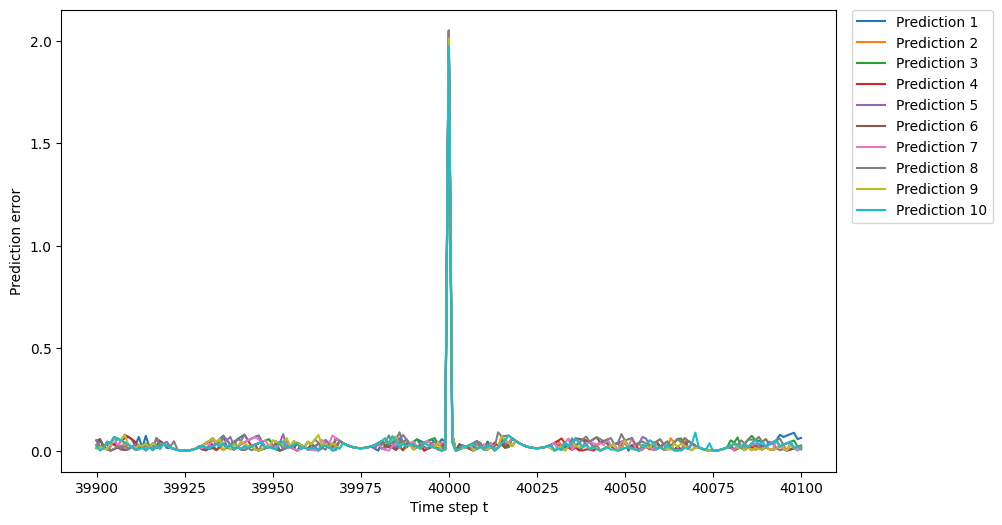

In [28]:
plot_prediction_absolute_error(case2_error_abs_value)

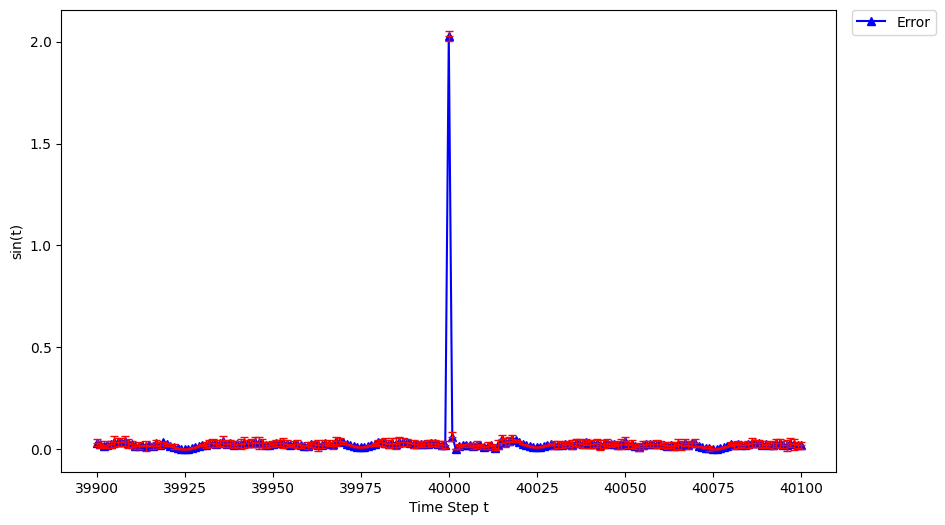

In [29]:
plot_prediction_absolute_error_by_mean_std(case2_error_abs_value, sampling_interval=config.sampling_interval)

## Case 3

In [30]:
case3_df = load_csv_data(config.case3_predict_results_path)
case3_df.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,0.500000,NaN,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,NaN
1,2,0.531395,NaN,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,NaN
2,3,0.562667,NaN,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,NaN
3,4,0.593691,NaN,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,NaN
4,5,0.624345,NaN,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,NaN


In [31]:
case3_df.tail()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
119996,59996,NaN,NaN,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,NaN
119997,59997,NaN,NaN,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,NaN
119998,59998,NaN,NaN,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,NaN
119999,59999,NaN,NaN,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105,NaN
120000,60000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [32]:
# true values need to be shifted by 1
true_values = case3_df["TRUE"][config.start+1:config.end+1+1]
true_values

39901    2.531400
39902    2.562670
39903    2.593690
39904    2.624340
39905    2.654510
           ...   
40097    0.406309
40098    0.437333
40099    0.468605
40100    0.500000
40101    0.531395
Name: TRUE, Length: 201, dtype: float64

In [33]:
predicted_column = list(map(lambda x: str(x), range(1, config.nTrial+1)))
case3_predicted_values = case3_df[predicted_column][config.start:config.end+1]
case3_predicted_values

,1,2,3,4,5,6,7,8,9,10
39900,0.9975,0.9975,0.9975,0.9975,0.9975,0.9975,0.9975,0.9975,0.9975,0.9975
39901,0.9975,0.9975,0.9975,0.9975,0.9975,0.9975,0.9975,0.9975,0.9975,0.9975
39902,0.9975,0.9975,0.9975,0.9975,0.9975,0.9975,0.9975,0.9975,0.9975,0.9975
39903,0.9975,0.9975,0.9975,0.9975,0.9975,0.9975,0.9975,0.9975,0.9975,0.9975
39904,0.9975,0.9975,0.9975,0.9975,0.9975,0.9975,0.9975,0.9975,0.9975,0.9975
...,...,...,...,...,...,...,...,...,...,...
40096,0.4075,0.4075,0.4075,0.4075,0.4075,0.4075,0.4075,0.4075,0.4075,0.4075
40097,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375
40098,0.4675,0.4675,0.4675,0.4675,0.4675,0.4675,0.4675,0.4675,0.4675,0.4675
40099,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000


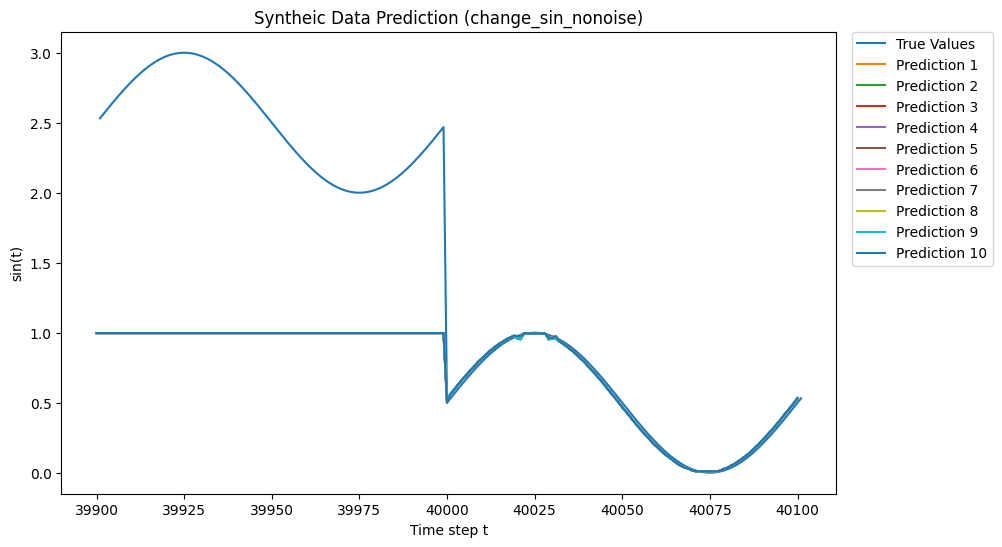

In [34]:
plot_syntheic_load(true_values, case3_predicted_values, config.test_data_path)

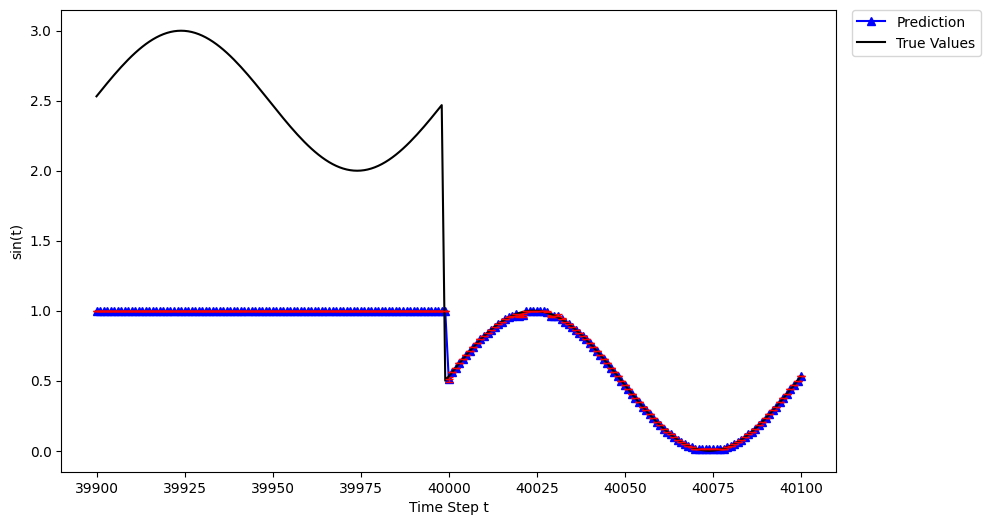

In [35]:
plot_syntheic_load_by_mean_std(true_values, case3_predicted_values, sampling_interval=config.sampling_interval)

In [36]:
# abs(outputdata[n][a] - inputdata[a+1])
case3_error_abs_value = case3_df[predicted_column][config.error_abs_start:config.error_abs_end+1]
case3_error_abs_value

,1,2,3,4,5,6,7,8,9,10
99900,1.502500,1.502500,1.502500,1.502500,1.502500,1.502500,1.502500,1.502500,1.502500,1.502500
99901,1.533900,1.533900,1.533900,1.533900,1.533900,1.533900,1.533900,1.533900,1.533900,1.533900
99902,1.565170,1.565170,1.565170,1.565170,1.565170,1.565170,1.565170,1.565170,1.565170,1.565170
99903,1.596190,1.596190,1.596190,1.596190,1.596190,1.596190,1.596190,1.596190,1.596190,1.596190
99904,1.626840,1.626840,1.626840,1.626840,1.626840,1.626840,1.626840,1.626840,1.626840,1.626840
...,...,...,...,...,...,...,...,...,...,...
100096,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655
100097,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191
100098,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167
100099,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105


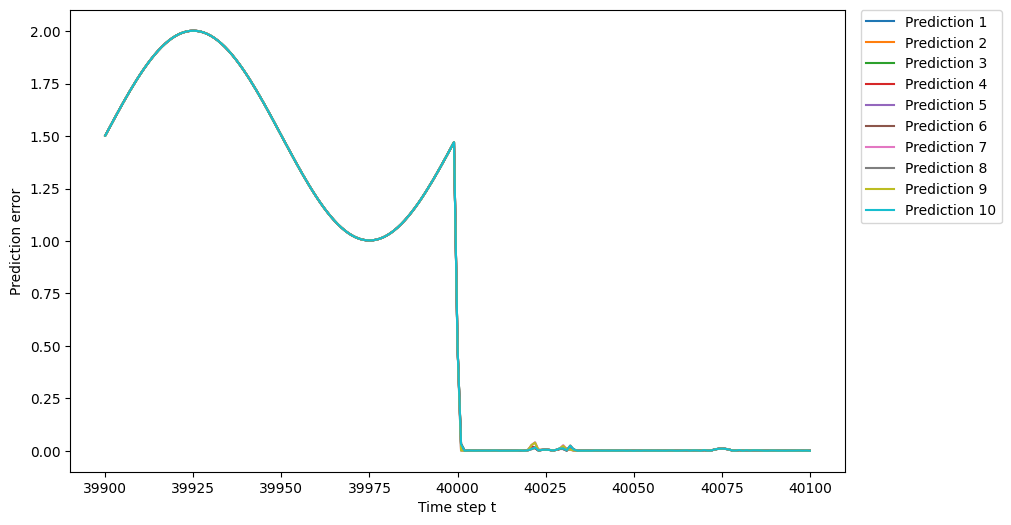

In [37]:
plot_prediction_absolute_error(case3_error_abs_value)

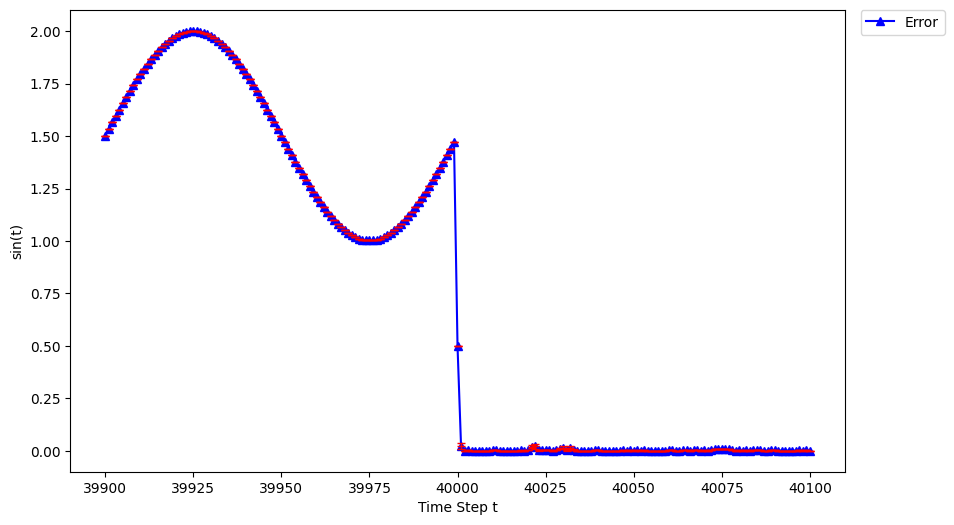

In [38]:
plot_prediction_absolute_error_by_mean_std(case3_error_abs_value, sampling_interval=config.sampling_interval)

## proposed(case4)

In [39]:
case4_df = load_csv_data(config.case4_predict_results_path)
case4_df.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,0.500000,NaN,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,NaN
1,2,0.531395,NaN,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,0.5325,NaN
2,3,0.562667,NaN,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,0.5625,NaN
3,4,0.593691,NaN,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,0.5925,NaN
4,5,0.624345,NaN,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,0.6250,NaN


In [40]:
# true values need to be shifted by 1
true_values = case4_df["TRUE"][config.start+1:config.end+1+1]
true_values

39901    2.531400
39902    2.562670
39903    2.593690
39904    2.624340
39905    2.654510
           ...   
40097    0.406309
40098    0.437333
40099    0.468605
40100    0.500000
40101    0.531395
Name: TRUE, Length: 201, dtype: float64

In [41]:
predicted_column = list(map(lambda x: str(x), range(1, config.nTrial+1)))
case4_predicted_values = case4_df[predicted_column][config.start:config.end+1]
case4_predicted_values

,1,2,3,4,5,6,7,8,9,10
39900,2.53250,2.53250,2.53250,2.53250,2.53250,2.53250,2.53250,2.53250,2.53250,2.53250
39901,2.56375,2.56375,2.56375,2.56375,2.56375,2.56375,2.56375,2.56375,2.56375,2.56375
39902,2.59500,2.59500,2.59500,2.59500,2.59500,2.59500,2.59500,2.59500,2.59500,2.59500
39903,2.62500,2.62500,2.62500,2.62500,2.62500,2.62500,2.62500,2.62500,2.62500,2.62500
39904,2.65500,2.65500,2.65500,2.65500,2.65500,2.65500,2.65500,2.65500,2.65500,2.65500
...,...,...,...,...,...,...,...,...,...,...
40096,0.40750,0.40750,0.40750,0.40750,0.40750,0.40750,0.40750,0.40750,0.40750,0.40750
40097,0.43750,0.43750,0.43750,0.43750,0.43750,0.43750,0.43750,0.43750,0.43750,0.43750
40098,0.46750,0.46750,0.46750,0.46750,0.46750,0.46750,0.46750,0.46750,0.46750,0.46750
40099,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000


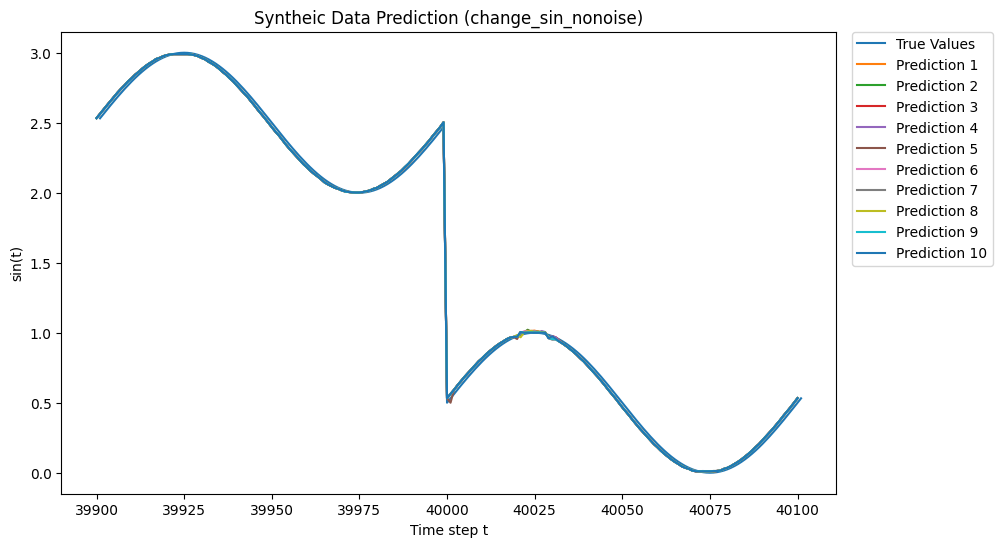

In [42]:
plot_syntheic_load(true_values, case4_predicted_values, config.test_data_path)

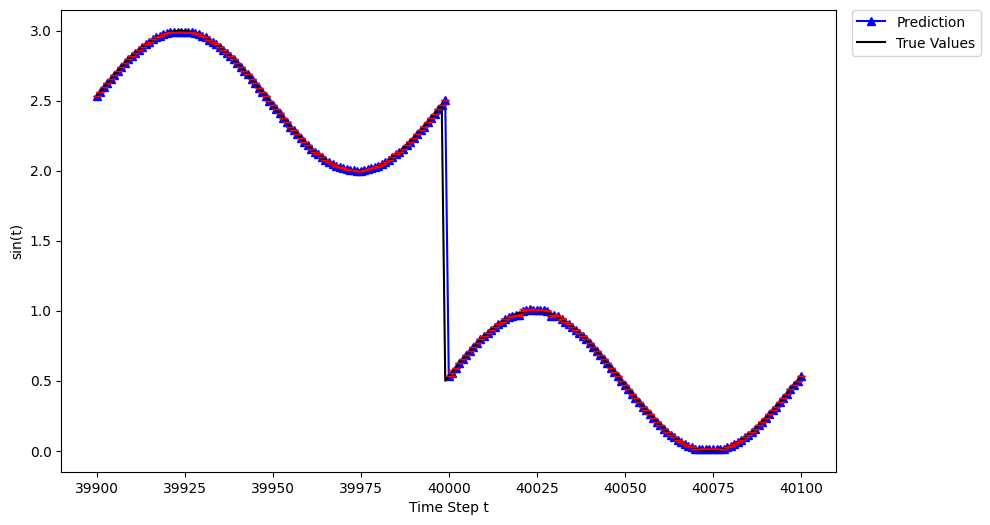

In [43]:
plot_syntheic_load_by_mean_std(true_values, case4_predicted_values, sampling_interval=config.sampling_interval)

In [44]:
# abs(outputdata[n][a] - inputdata[a+1])
case4_error_abs_value = case4_df[predicted_column][config.error_abs_start:config.error_abs_end+1]
case4_error_abs_value

,1,2,3,4,5,6,7,8,9,10
99900,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.000000,0.002500,0.002500,0.002500
99901,0.001100,0.001100,0.001100,0.001100,0.001100,0.001100,0.001100,0.001100,0.001100,0.001100
99902,0.001080,0.001080,0.001080,0.001080,0.001080,0.001080,0.001080,0.001080,0.001080,0.001080
99903,0.001310,0.001310,0.001310,0.001310,0.001310,0.001310,0.001310,0.001310,0.001310,0.001310
99904,0.000660,0.000660,0.000660,0.000660,0.000660,0.000660,0.000660,0.000660,0.000660,0.000660
...,...,...,...,...,...,...,...,...,...,...
100096,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655,0.000655
100097,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191
100098,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167
100099,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105,0.001105


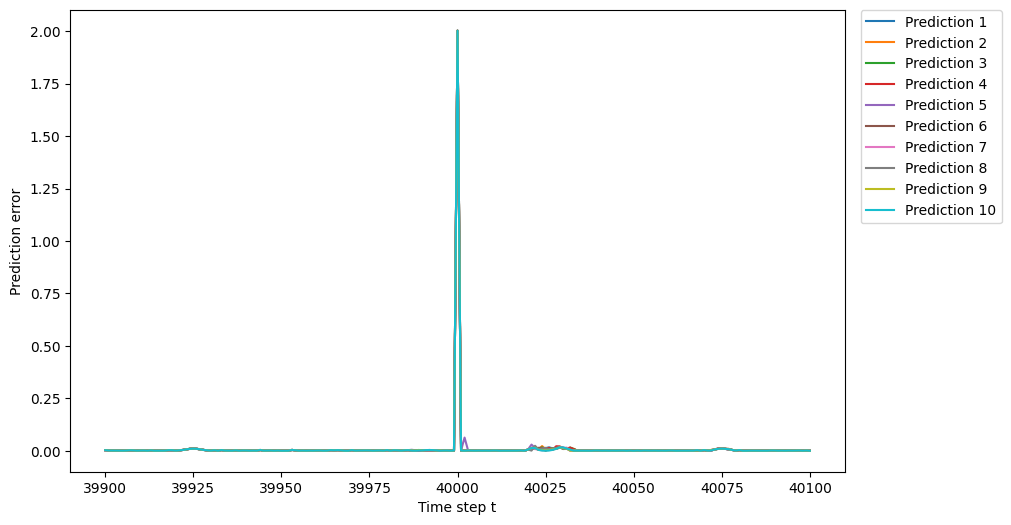

In [45]:
plot_prediction_absolute_error(case4_error_abs_value)

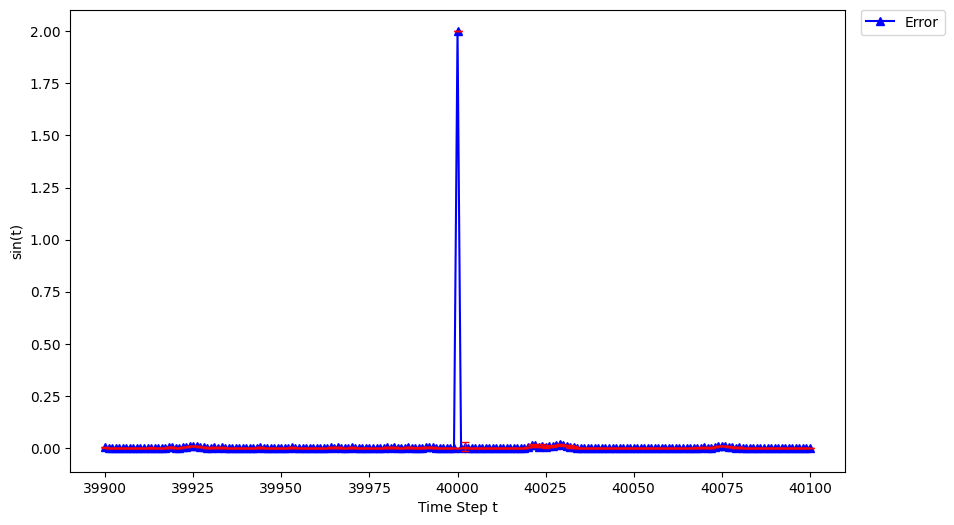

In [46]:
plot_prediction_absolute_error_by_mean_std(case4_error_abs_value, sampling_interval=config.sampling_interval)

# Summary

In [47]:
predicted_values_list = []
error_abs_value_list = []

# The following are the case labels you want to pass
labels = ['Case 1', 'Case 2', 'Case 3', 'Case 4']
# labels = ['Case 1', 'Case 4']

# The following are the case labels you want to pass
predicted_values_list.append(case1_predicted_values)    # Add prediction values for Case 1
predicted_values_list.append(case2_predicted_values)    # Add prediction values for Case 2
predicted_values_list.append(case3_predicted_values)    # Add prediction values for Case 3
predicted_values_list.append(case4_predicted_values)    # Add prediction values for Case 4


error_abs_value_list.append(case1_error_abs_value)      # Add error values for Case 1
error_abs_value_list.append(case2_error_abs_value)      # Add error values for Case 2
error_abs_value_list.append(case3_error_abs_value)      # Add error values for Case 3
error_abs_value_list.append(case4_error_abs_value)      # Add error values for Case 4

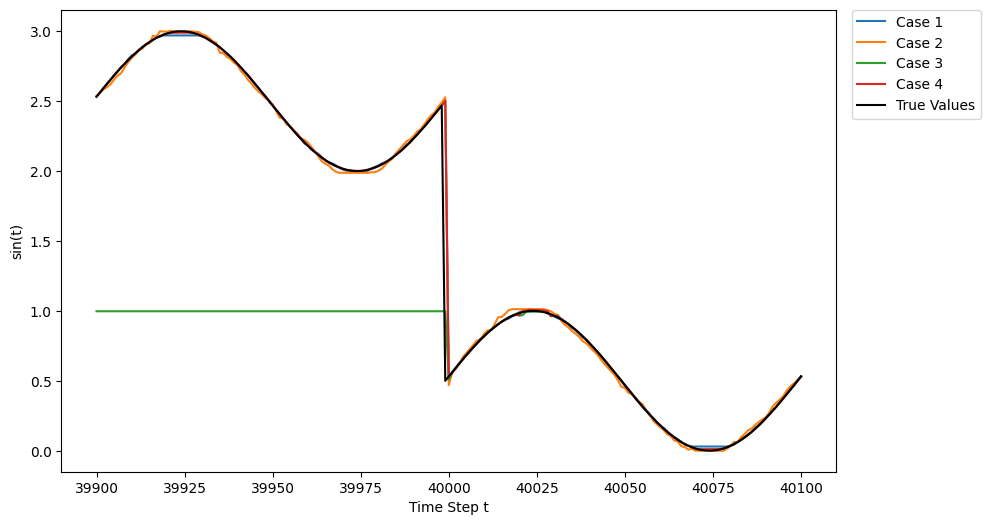

In [48]:
# plot_syntheic_load_list_by_mean_std(true_values, predicted_values_list, sampling_interval=config.sampling_interval)
plot_syntheic_load_list_by_mean_std_with_labels(true_values, predicted_values_list, labels=labels, sampling_interval=config.sampling_interval)


In [49]:
# zoom_coords = ((zoom_xmin, zoom_xmax), (zoom_ymin, zoom_ymax))
# plot_prediction_absolute_error_list_by_mean_std(error_abs_value_list, sampling_interval=config.sampling_interval, zoom_coords=config.zoom_coords)
plot_prediction_absolute_error_list_by_mean_std_with_labels(error_abs_value_list, labels=labels ,sampling_interval=config.sampling_interval, zoom_coords=config.zoom_coords)

ValueError: Image size of 71678x525 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x600 with 2 Axes>